**Importing Required Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'DejaVu Sans'

C:\Users\EliteBook\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Reading Data from Folder Fucntion**

In [2]:
def read_data_from_folder(folder_path):
    # Read the text files from the given folder path
    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            news = file.read()
            data.append(news)
    return data

**Path of All Data Folders**

In [3]:
# Set the path to the dataset folders
corpus_paths = [
    "1.Corpus/Test/Fake",
    "1.Corpus/Test/Real",
    "1.Corpus/Train/Fake",
    "1.Corpus/Train/Real",
    "2.CorpusMT/Test/Fake",
    "2.CorpusMT/Test/Real",
    "2.CorpusMT/Train/Fake",
    "2.CorpusMT/Train/Real",
    "3.Corpus_Mixed/Test/Fake",
    "3.Corpus_Mixed/Test/Real",
    "3.Corpus_Mixed/Train/Fake",
    "3.Corpus_Mixed/Train/Real",
    "4.Corpus_Mixed_Downsize/Test/Fake",
    "4.Corpus_Mixed_Downsize/Test/Real",
    "4.Corpus_Mixed_Downsize/Train/Fake",
    "4.Corpus_Mixed_Downsize/Train/Real",
    "5.Cross_MT_Orignal/Test/Fake",
    "5.Cross_MT_Orignal/Test/Real",
    "5.Cross_MT_Orignal/Train/Fake",
    "5.Cross_MT_Orignal/Train/Real",
    "6.Cross_Orignal_MT/Test/Fake",
    "6.Cross_Orignal_MT/Test/Real",
    "6.Cross_Orignal_MT/Train/Fake",
    "6.Cross_Orignal_MT/Train/Real"
]


In [4]:
all_news = []
all_labels = []
for path in corpus_paths:
    news = read_data_from_folder(path)
    all_news += news
    label = [0] * len(news) if "Fake" in path else [1] * len(news)
    all_labels += label

# Tokenize and pad the sequences
max_words = 10000  # Maximum number of words to keep based on word frequency
max_len = 500  # Maximum length of each sequence (number of tokens)

In [5]:
cleaned_news = []
keywords = []

for news in all_news:
    # Preprocess the news
    cleaned_text = re.sub(r'[^\w\s]', '', news)
    cleaned_news.append(cleaned_text)

In [6]:
# Perform key extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_news)

In [7]:
# Extract top 5 keywords for each news article
for i in range(len(all_news)):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    top_keywords = tfidf_scores.argsort()[::-1][:5]  # Extract top 5 keywords
    keywords.append([tfidf_vectorizer.get_feature_names()[index] for index in top_keywords])

In [8]:
all_news = []
all_labels = []
news_counts = []
folder_names = []

for path in corpus_paths:
    news = read_data_from_folder(path)
    folder_name = path.split("/")[-1]
    count = len(news)
    news_counts.append(count)
    folder_names.append(folder_name)
    all_news += news
    label = [0] * len(news) if "Fake" in path else [1] * len(news)
    all_labels += label  
    print("News in", folder_name, ":", count)



News in Fake : 112
News in Real : 150
News in Fake : 288
News in Real : 350
News in Fake : 60
News in Real : 60
News in Fake : 140
News in Real : 140
News in Fake : 172
News in Real : 210
News in Fake : 428
News in Real : 490
News in Fake : 120
News in Real : 147
News in Fake : 299
News in Real : 343
News in Fake : 112
News in Real : 150
News in Fake : 140
News in Real : 140
News in Fake : 60
News in Real : 60
News in Fake : 288
News in Real : 350


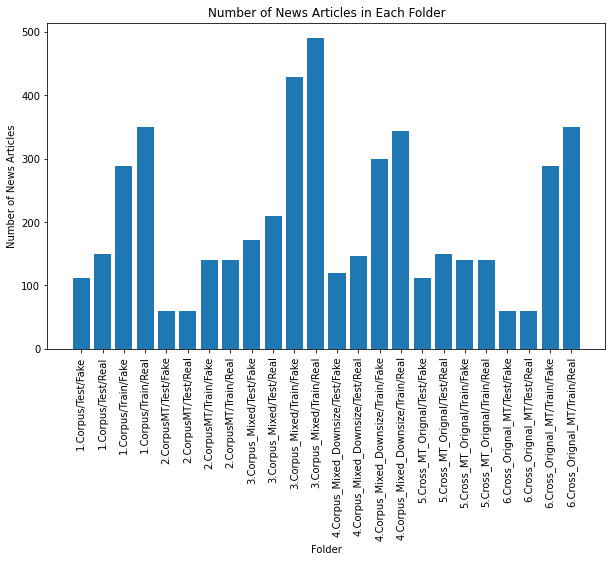

In [9]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(corpus_paths, news_counts)
plt.xticks(rotation=90)
plt.xlabel("Folder")
plt.ylabel("Number of News Articles")
plt.title("Number of News Articles in Each Folder")
plt.show()

In [10]:
for keyword in keywords:
    print(keyword)

['الیکٹرک', 'ڈیملر', 'امرکین', 'چین', 'بینز']
['کارڈ', 'ٹیکس', 'ڈیبٹ', 'یا', 'سلسلے']
['تیل', 'خریداری', 'امریکا', 'چین', 'ملکوں']
['پراپرٹی', 'چیمبر', 'رجسٹریشن', 'زمینی', 'کے']
['معدنی', 'بلوچستان', 'وسائل', 'وزیراعلی', 'صوبے']
['جیانگ', 'انٹرنیٹ', 'نمائش', 'صوبہ', 'کمنیوں']
['سبسڈی', 'وزرات', 'جاری', 'خزانہ', 'مد']
['طیارے', 'تجرباتی', 'بنیادوں', 'روبل', 'ایروسپیس']
['اسلامی', 'موٹرز', 'بینک', 'فیض', 'بلال']
['ضیاء', 'قادر', 'قریشی', 'برطرفی', 'نوٹیفکیشن']
['ایران', 'تیل', 'ایرانی', 'ترکی', 'امریکہ']
['بشل', 'سودے', 'سینٹ', 'مکئی', 'طے']
['سویابین', 'چین', 'تجارتی', 'جنگ', 'امریکہ']
['ائرس', 'تجارتی', 'ڈیل', 'بیونس', 'ڈونلڈ']
['خون', 'کی', 'ٹھنڈے', 'جسم', 'میں']
['بدبو', 'پیروں', 'غدود', 'سرف', 'جرابوں']
['دکھ', 'کے', 'انسان', 'کسی', 'تحقیقاتی']
['شراب', 'بایوٹکس', 'اینٹی', 'پینے', 'ہے']
['پانی', 'لیموں', 'ورزش', 'پینے', 'گردے']
['زم', 'شفا', 'آب', 'پانی', 'نبی']
['فضلے', 'بیکٹیریا', 'معدے', 'کے', 'بیمار']
['لبلبے', 'سرطان', 'زبان', 'روبوٹ', 'بیکٹیریا']
['پانی', 'پینے', 'وزن', 'پینا

['ایپل', 'استاد', 'ہے', 'مفت', 'کمپنی']
['400', '500', 'ستمبر', 'بدھ', 'ملین']
['آرکٹک', 'روس', 'قیمتوں', 'انتظار', '70']
['سویڈن', 'ٹیکس', 'واپس', 'مالیاتی', 'ٹیوٹ']
['انٹرنیٹ', 'اعداد', 'تحفظات', 'کے', 'شمار']
['انٹرنیٹ', 'کے', 'کسٹمر', 'حفاظتی', 'ووٹ']
['کے', 'کو', 'مشکل', 'چیلنج', 'لئے']
['سعودی', 'تیل', 'عرب', 'ارامکو', 'ٹیکس']
['روبوٹ', 'سوٹ', 'کانفرنس', 'کمپنی', 'کی']
['مرفی', 'مدف', 'ہیج', 'چارلس', 'سرمایہ']
['بلین', 'ڈالر', 'لیام', 'قطر', 'فاکس']
['ویسٹنگ', 'ہاؤس', 'دیوالیہ', 'نقصانات', 'کے']
['سلیکن', 'گانا', 'انٹرنیٹ', 'جانبداری', 'خالص']
['کے', 'نے', 'ملاتے', 'اسپیسر', 'صدر']
['نیوٹن', 'جان', 'سالگرہ', 'میں', '40']
['گھوسٹ', 'شیل', 'نایاب', 'مرکز', 'طرح']
['جسٹس', 'سپرمین', 'لیگ', 'ہے', 'میں']
['کمبربچ', 'ہنٹر', 'بینیڈکٹ', 'مقدم', 'خبر']
['کے', 'alief', 'موم', 'گارڈ', 'بیونس']
['براؤن', 'اجنبی', 'ملبی', 'چیزیں', 'بابی']
['سالگرہ', 'ونسرپون', 'ریز', 'شادی', 'جشن']
['جیلینل', 'چیزیں', 'یہاں', 'کردار', 'میں']
['پارٹی', 'ایلٹن', 'لیڈی', 'جان', 'سالگرہ']
['پتلی', 'پراٹ', 'کرس', 

['کرکٹ', 'آسٹریلیا', 'سزا', 'میں', 'آسٹریلوی']
['کے', 'ڈویژن', 'محمد', 'ریلوے', 'جوڈو']
['بائلز', 'نسر', 'جمناسٹک', 'جنسی', 'سمون']
['کرکٹ', 'سی', 'بورڈ', 'سیریز', 'پاکستان']
['نورین', 'افشاں', 'ہاکی', 'ایونٹس', 'ہے']
['سوریا', 'سنتھ', 'سپاری', 'سری', 'جے']
['برازیل', 'پیرو', 'کے', 'لئے', 'آؤٹگو']
['جیٹ', 'لئے', 'کے', 'بجے', 'رابرٹو']
['پولیس', 'بل', 'قانون', 'کے', 'سرکاری']
['فیڈرر', 'کے', 'ماسٹرز', 'بیج', 'رابرٹو']
['wwe', 'paige', 'خود', 'غلطی', 'اسٹار']
['رونالڈو', 'کرسٹریانو', 'کے', 'لے', 'مشترکہ']
['بلیک', 'کے', 'سلیمان', 'موسم', 'گرما']
['نیرمر', 'شام', 'برازیل', 'کپ', 'کے']
['وٹین', 'کاؤبای', 'سالہ', 'معاہدے', '000']
['جرسی', 'باؤل', 'ملر', 'ہیلمیٹ', 'برونکو']
['لسی', 'سیئٹل', 'راولز', 'seahawks', 'چارلس']
['چیلسی', 'رامون', 'ایڈن', 'خطرے', 'ریئل']
['فیس', 'بک', 'کمپنی', 'کے', 'شٹر']
['کوانٹم', 'کمپیوٹروں', 'سرکٹ', 'محققین', 'کمپیوٹر']
['مارک', 'اینڈرائڈ', 'زکربرگ', 'زکر', 'پرائیوسی']
['سینسر', 'بائیو', 'انفیکشن', 'بیکٹیریا', 'نمونے']
['خلائی', 'اومواموا', 'تحقیق', 'مخلوق', 'سی

['برازیل', 'پیرو', 'کے', 'لئے', 'آؤٹگو']
['جیٹ', 'لئے', 'کے', 'بجے', 'رابرٹو']
['پولیس', 'بل', 'قانون', 'کے', 'سرکاری']
['فیڈرر', 'کے', 'ماسٹرز', 'بیج', 'رابرٹو']
['wwe', 'paige', 'خود', 'غلطی', 'اسٹار']
['رونالڈو', 'کرسٹریانو', 'کے', 'لے', 'مشترکہ']
['بلیک', 'کے', 'سلیمان', 'موسم', 'گرما']
['نیرمر', 'شام', 'برازیل', 'کپ', 'کے']
['وٹین', 'کاؤبای', 'سالہ', 'معاہدے', '000']
['جرسی', 'باؤل', 'ملر', 'ہیلمیٹ', 'برونکو']
['لسی', 'سیئٹل', 'راولز', 'seahawks', 'چارلس']
['چیلسی', 'رامون', 'ایڈن', 'خطرے', 'ریئل']
['کوانٹم', 'کمپیوٹروں', 'سرکٹ', 'محققین', 'کمپیوٹر']
['مارک', 'اینڈرائڈ', 'زکربرگ', 'زکر', 'پرائیوسی']
['سینسر', 'بائیو', 'انفیکشن', 'بیکٹیریا', 'نمونے']
['مقامی', 'فیس', 'بک', 'نیوزفیڈ', 'تبدیلیوں']
['فون', 'موبائل', 'نوکیا', '3310', 'متعارف']
['سیارچے', 'خلائی', 'گاڑیاں', 'ریوگو', 'سطح']
['فیڈ', 'فیس', 'بک', 'تبدیلی', 'نیوز']
['صارفین', 'دوستوں', 'انسٹا', 'منتخب', 'گرام']
['ارسینک', 'پانی', 'نبیل', 'فلٹر', 'اباد']
['سکائپ', 'چین', 'ایپ', 'ایپل', 'ایپس']
['ہواوے', 'فون', 'تنزلی', 'کمپن

['فیڈرر', 'اوپن', 'سیٹ', 'جیتنے', 'فریڈر']
['میامی', 'پوائنٹس', 'چوٹ', 'مرے', 'اینڈی']
['فارمولا', 'برنی', 'ون', 'کے', 'شپ']
['ڈوپنگ', 'شوقیہ', 'کھیل', 'کھیلوں', 'بی']
['ڈوپنگ', 'منشیات', 'کھیلوں', 'شوقیہ', 'بی']
['کے', 'پارلیمانوں', 'ضمیمہ', 'ڈاکٹر', 'فرحہ']
['جیسسکا', 'نبیبس', 'لینن', 'الیگزینڈر', 'برمنگھم']
['جرسی', '000', 'بریڈیڈی', 'ہیوسٹن', 'کنندہ']
['گرینڈسن', 'پانی', 'لاکر', '12', 'اس']
['کینٹکی', 'کیلپاری', 'کھیل', 'ایل', 'علاقائی']
['جیمز', 'لیبرون', 'کے', 'جادوگروں', 'دھوپ']
['آگ', 'اسٹیڈیم', 'شنگھائی', 'کے', 'اخراجات']
['گرینڈ', 'پری', 'جیت', 'ٹریکول', 'لڑتی']
['جوان', 'ڈائی', 'کی', 'کے', 'لائنڈ']
['انگلینڈ', 'کے', 'لنکاشائر', 'ایشز', 'اینڈرسن']
['لڑے', 'ماریا', 'ڈوپنگ', 'سچ', 'ٹینس']
['چیلسی', 'گرما', 'منتقلی', 'ایلیکسس', 'سنچز']
['ولیم', 'کے', 'مینیجر', 'انگلینڈ', 'ٹائمکل']
['الرجی', 'خوراک', 'پھلی', 'مونگ', 'میں']
['فون', 'کیمرا', 'گیمنگ', 'پکسل', 'میگا']
['سٹائن', 'آئن', 'خدا', 'ہے', 'میں']
['وانژو', 'مینگ', 'سماعت', 'امریکا', 'گرفتار']
['کورا', 'صارفین', 'پاسورڈ', 'ڈیٹ

['سویڈن', 'ٹیکس', 'واپس', 'مالیاتی', 'ٹیوٹ']
['انٹرنیٹ', 'اعداد', 'تحفظات', 'کے', 'شمار']
['انٹرنیٹ', 'کے', 'کسٹمر', 'حفاظتی', 'ووٹ']
['کے', 'کو', 'مشکل', 'چیلنج', 'لئے']
['سعودی', 'تیل', 'عرب', 'ارامکو', 'ٹیکس']
['روبوٹ', 'سوٹ', 'کانفرنس', 'کمپنی', 'کی']
['مرفی', 'مدف', 'ہیج', 'چارلس', 'سرمایہ']
['بلین', 'ڈالر', 'لیام', 'قطر', 'فاکس']
['ویسٹنگ', 'ہاؤس', 'دیوالیہ', 'نقصانات', 'کے']
['سلیکن', 'گانا', 'انٹرنیٹ', 'جانبداری', 'خالص']
['کے', 'نے', 'ملاتے', 'اسپیسر', 'صدر']
['نیوٹن', 'جان', 'سالگرہ', 'میں', '40']
['گھوسٹ', 'شیل', 'نایاب', 'مرکز', 'طرح']
['جسٹس', 'سپرمین', 'لیگ', 'ہے', 'میں']
['کمبربچ', 'ہنٹر', 'بینیڈکٹ', 'مقدم', 'خبر']
['کے', 'alief', 'موم', 'گارڈ', 'بیونس']
['براؤن', 'اجنبی', 'ملبی', 'چیزیں', 'بابی']
['سالگرہ', 'ونسرپون', 'ریز', 'شادی', 'جشن']
['جیلینل', 'چیزیں', 'یہاں', 'کردار', 'میں']
['پارٹی', 'ایلٹن', 'لیڈی', 'جان', 'سالگرہ']
['پتلی', 'پراٹ', 'کرس', 'بہت', 'ہے']
['فشر', 'یادگار', 'کیری', 'ڈیبی', 'رینالڈس']
['h1b', 'ویزا', 'حکم', 'اثر', 'سامانوں']
['سفر', 'صنعت', 'امریکی

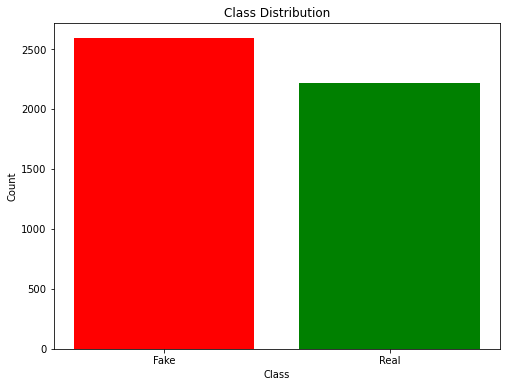

In [11]:
plt.figure(figsize=(8, 6))
class_counts = pd.Series(all_labels).value_counts()
class_labels = ["Fake", "Real"]
colors = ["red", "green"]  # Define colors for each class

plt.bar(class_labels, class_counts, color=colors)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [12]:
# Create a DataFrame from the data
df = pd.DataFrame({'news': all_news, 'label': all_labels})

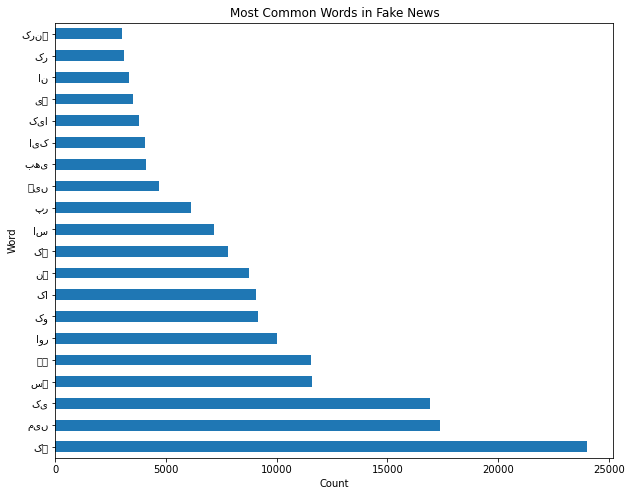

In [13]:

# Get the word frequency for each label
fake_news = ' '.join(df[df['label'] == 0]['news'])
real_news = ' '.join(df[df['label'] == 1]['news'])
fake_word_counts = pd.Series(fake_news.split()).value_counts()
real_word_counts = pd.Series(real_news.split()).value_counts()

# Plot the most common words for fake news
plt.figure(figsize=(10, 8))
fake_word_counts.head(20).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Most Common Words in Fake News')
plt.show()

In [14]:
df.head()

,news,label
0,\nسٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 03 دسمب...,0
1,\n\nکراچی ( آن لائن ) حکومت نے عوام کو باہرکری...,0
2,\n\nبیجنگ چینی حکومت نے امریکا سے تیل کی خریدا...,0
3,\n\nلاہور(کامرس رپورٹر) لاہور چیمبر کے صدر الم...,0
4,\nکوئٹہ ( آن لائن ) چینی ریسرچ اور سرمایہ کار ...,0


In [15]:
df.sample(10)

,news,label
1557,امریکی ٹریول انڈسٹری کو 'کھو ڈایڈڈ' کے تحت ٹرا...,1
4781,تصویر کے کاپی رائٹ Getty Images\n\nایک امریکی ...,1
2150,کراچی (کامرس رپورٹر) سعودی عرب کی نئی اور مکمل...,1
1846,Schumer: کل صحت کی دیکھ بھال بون ٹرم\n\n\n\nسی...,0
32,منی سوٹا نئی امریکی تحقیق سے یہ تشویش ناک بات...,0
763,کابل 5 دسمبر (سیاست ڈاٹ کام ) افغانستان کے صدر...,1
3001,لاہور(سٹاف رپورٹر ) سینی پیکس سینما نے اپنے صا...,0
2040,﻿پاکستان میں درآمد کيے گئے یا بطور تحائف دئيے ...,0
4248,کراچی میں آپریشن کے دوران ڈاکڑز کی غفلت کی بدو...,0
2530,پاکستان میں چھینے گئے یا اسمگل موبائل فونز کو ...,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    4809 non-null   object
 1   label   4809 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.3+ KB


In [17]:
df.describe()

,label
count,4809.000000
mean,0.538574
std,0.498562
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [18]:
# Tokenize and pad the sequences
max_words = 10000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(all_news)
sequences = tokenizer.texts_to_sequences(all_news)
data = pad_sequences(sequences, maxlen=max_len)
labels = np.array(all_labels)

In [19]:
# Split the data into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation="sigmoid"))


In [20]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [21]:
# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=3)


In [22]:
# Train the model
batch_size = 32
epochs = 10

history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_data, val_labels), callbacks=[early_stopping])

Epoch 1/10
97/97 [==============================] - 67s 662ms/step - loss: 0.6466 - accuracy: 0.6207 - val_loss: 0.5448 - val_accuracy: 0.7455
Epoch 2/10
97/97 [==============================] - 64s 662ms/step - loss: 0.3617 - accuracy: 0.8508 - val_loss: 0.3653 - val_accuracy: 0.8532
Epoch 3/10
97/97 [==============================] - 66s 679ms/step - loss: 0.1824 - accuracy: 0.9318 - val_loss: 0.2958 - val_accuracy: 0.8961
Epoch 4/10
97/97 [==============================] - 67s 692ms/step - loss: 0.1360 - accuracy: 0.9509 - val_loss: 0.2716 - val_accuracy: 0.9013
Epoch 5/10
97/97 [==============================] - 67s 693ms/step - loss: 0.0988 - accuracy: 0.9636 - val_loss: 0.2105 - val_accuracy: 0.9169
Epoch 6/10
97/97 [==============================] - 66s 682ms/step - loss: 0.0837 - accuracy: 0.9678 - val_loss: 0.2357 - val_accuracy: 0.9234
Epoch 7/10
97/97 [==============================] - 69s 710ms/step - loss: 0.0817 - accuracy: 0.9669 - val_loss: 0.2244 - val_accuracy: 0.9221

In [23]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

31/31 [==============================] - 6s 180ms/step - loss: 0.2088 - accuracy: 0.9397
Test Loss: 0.20881687104701996
Test Accuracy: 0.939708948135376


In [26]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
test_predictions = model.predict(test_data)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Assuming you have the test labels in 'test_labels' and model predictions in 'test_predictions'
confusion_mat = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[423  25]
 [ 33 481]]


In [27]:
from sklearn.metrics import classification_report

# Assuming you have the test labels in 'test_labels' and model predictions in 'test_predictions'
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       448
           1       0.95      0.94      0.94       514

    accuracy                           0.94       962
   macro avg       0.94      0.94      0.94       962
weighted avg       0.94      0.94      0.94       962



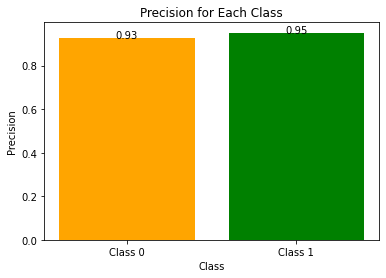

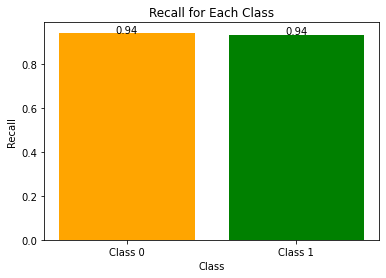

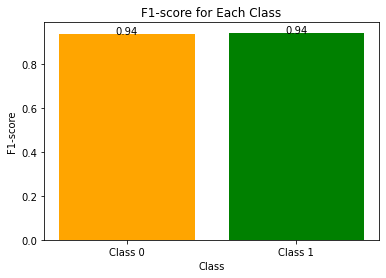

In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions on the test data
test_predictions = model.predict(test_data)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, and F1-score
confusion_mat = confusion_matrix(test_labels, test_predictions)
precision_values = precision_score(test_labels, test_predictions, average=None)
recall_values = recall_score(test_labels, test_predictions, average=None)
f1_values = f1_score(test_labels, test_predictions, average=None)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create a bar plot for precision
plt.figure(figsize=(6, 4))
plt.bar(class_labels, precision_values, color=['#FFA500', '#008000'])
plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for Each Class')

# Add value labels on top of each bar
for i, v in enumerate(precision_values):
    plt.text(i, v, f"{v:.2f}", color='black', ha='center')

plt.show()

# Create a bar plot for recall
plt.figure(figsize=(6, 4))
plt.bar(class_labels, recall_values, color=['#FFA500', '#008000'])
plt.xlabel('Class')
plt.ylabel('Recall')
plt.title('Recall for Each Class')

# Add value labels on top of each bar
for i, v in enumerate(recall_values):
    plt.text(i, v, f"{v:.2f}", color='black', ha='center')

plt.show()

# Create a bar plot for F1-score
plt.figure(figsize=(6, 4))
plt.bar(class_labels, f1_values, color=['#FFA500', '#008000'])
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.title('F1-score for Each Class')

# Add value labels on top of each bar
for i, v in enumerate(f1_values):
    plt.text(i, v, f"{v:.2f}", color='black', ha='center')

plt.show()
